<a href="https://colab.research.google.com/github/instar94/mleng/blob/main/04_2)_%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 확률적 경사하강법
## 1) 온라인 학습 (점진적 학습)
- 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 훈련을 진행
- 대표적인 알고리즘 : 확률적 경사하강법

## 2) 확률적 경사하강법
### 경사하강법의 정의
- 확률 : 무작위 혹은 랜덤하게
- 경사 : 기울기
- 하강 : 내려가게함
-  훈련 세트에서 랜덤하게 하나의 샘플 선택 > 가파른 경사 조금 내려감 > 반복 
      -  훈련 세트를 모두 사용 > `에포크` 완료 > 새로운 데이터 추가 
-  `에포크` : 훈련 세트를 모두 사용하는 일련의 과정 

### 경사하강법의 종류
- `미니배치 경사 하강법` : 무작위 샘플을 여러 개 선택하여 경사하강법을 시행 하는 것 
- `배치 경사 하강법` : 전체 샘플을 사용하여 경사 하강법을 시행하는 것 
- `확률적 경사 하강법` : 무작위 1개를 이용해 경사하강법을 시행 

### 경사하강법의 목표
- 목표 : 경사하강법을 이용해 손실 함수의 최소값을 구하는 것

## 3) 손실 함수 
- 머신러닝 알고리즘이 얼마나 엉터리 인지 (=오차가 심한지) 측정하는 기준 
    - 작을 수록 좋음 
    - 최소값을 구해야함 

### 로지스틱 손실 함수 (=이진 크로스엔트로피 손실)
- 양성 클래스일 때 손실은 $-log$ (예측 확률)로 계산 
- 확률이 0에 가까워질수록 손실은 큰 양수가 됨 
- 다중 분류에서는 `크로스 엔트로피 손실함수`를 사용 
- cf) 회귀의 손실 함수 : 평균 제곱 오차 

# 2. 데이터 처리 
## 1) CSV 읽기

In [1]:
import pandas as pd 
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


## 2) 훈련/테스트 세트 준비

In [8]:
### 추측 데이터 
fish_input = fish[["Weight","Length","Diagonal","Height","Width"]]
### 정답 데이터 
fish_target = fish["Species"]

### 훈련세트 - 테스트 세트 나누기 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target, random_state=42)

## 3) 전처리 

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

###표준화 fit 
ss.fit(train_input)

### 표준화 진행 
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 3. 확률률적 경사 하강법 실행 

## 1) 모델 fit 
- `loss = log_loss` : 로지스틱 손실함수
- `max_iter` : 에포크 수 
- 오류 :
  > ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit. 
  - 모델이 충분히 수렴하지 않음
  - 해결 방법 : `max_iter`를 늘리면 해결됨

In [12]:
from sklearn.linear_model import SGDClassifier

### 로지스틱 손실함수 + 에포크 
sc =SGDClassifier(loss="log_loss", max_iter=10, random_state=42)

### 모델 학습
sc.fit(train_scaled,train_target)

### 모델 평가 
print("모델 평가 (훈련) : ", sc.score(train_scaled,train_target))
print("모델 평가 (검증) : ", sc.score(test_scaled,test_target))

모델 평가 (훈련) :  0.773109243697479
모델 평가 (검증) :  0.775


c:\ProgramData\miniconda3\envs\ml_basic\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## 2) 점진적 학습 
- `partial_fit` : 점진적 학습 진행 

In [14]:
sc.partial_fit(train_scaled, train_target)

### 모델 평가 
print("모델 평가 (훈련) : ", sc.score(train_scaled,train_target))
print("모델 평가 (검증) : ", sc.score(test_scaled,test_target))

모델 평가 (훈련) :  0.8067226890756303
모델 평가 (검증) :  0.825


## 3) 에포크 과대/과소 적합 
- 얼마나 훈련을 해야 적절할 것인가? 
  - 과소 적합 : 너무 횟수가 적으면 훈련 세트를 덜 학습 
  - 과대 적합 : 훈련 세트에선 점수가 높지만 테스트에서는 점수가 낮음 

- `조기 종료` 
  - 모델의 적합도는 꾸준히 증가하다 어느순간 감소
- 감소하기 전에 종료하는 것 

- `practial_fit` 을 사용하려면 train_target의 라벨을 전달해야함 

In [15]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_socre=[]
test_score=[]

### train_target 라벨 전달 
classes = np.unique(train_target)

- 에포크 300 번 훈련
- `_` 변수 : 사용하지 않고 버리는 값을 넣어두는 용도 > 횟수를 임시로 저장하는 용도

In [16]:
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_socre.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

- 300번 시각화
- 100번째 에포크 이후 차이가 벌어지고 있음 

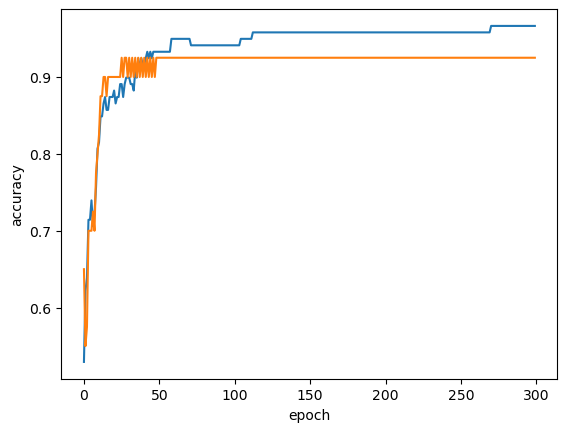

In [17]:
import matplotlib.pyplot as plt 
plt.plot(train_socre)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

## 4) 과소 적합 해결 후 적용 
- `tol=None` : 무조건 100번까지 반복 
- 설정하지 않으면 성능이 일정 수준까지 상향 되지 않으면 멈춤 

In [18]:
sc = SGDClassifier(loss="log_loss",max_iter=100, tol=None, random_state=42)

sc.fit(train_scaled, train_target)

### 모델 평가 
print("모델 평가 (훈련) : ", sc.score(train_scaled,train_target))
print("모델 평가 (검증) : ", sc.score(test_scaled,test_target))

모델 평가 (훈련) :  0.957983193277311
모델 평가 (검증) :  0.925


## 5) 손실 함수의 종류

- 기본 값 : 힌지 손실 (hinge)
- 서포트 벡터 머신 (SVM)으로 불림 

In [20]:
sc = SGDClassifier(loss="hinge",max_iter=100, tol=None, random_state=42)

sc.fit(train_scaled, train_target)

### 모델 평가 
print("모델 평가 (훈련) : ", sc.score(train_scaled,train_target))
print("모델 평가 (검증) : ", sc.score(test_scaled,test_target))

모델 평가 (훈련) :  0.9495798319327731
모델 평가 (검증) :  0.925
